### Phase 1: *Data Exploration*

In [64]:
# Importing the base libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Load the student-mat and student.por datasets
df_math = pd.read_csv('./dataset/student-mat.csv', sep=';')
df_portuguese = pd.read_csv('./dataset/student-por.csv', sep=';')

In [66]:
# Display the first few rows of the math dataset
print("Math Dataset:")
print(df_math.head())

Math Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [67]:
# Display the first few rows of the Portuguese dataset
print("Portuguese Dataset:")
print(df_portuguese.head())  

Portuguese Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [68]:
# Print the records count in the dataset
print("Number of records in Math Dataset:", len(df_math))
print("Number of records in Portuguese Dataset:", len(df_portuguese))

Number of records in Math Dataset: 395
Number of records in Portuguese Dataset: 649


In [69]:
# Check for missing values in the math dataset
print("Missing values in Math Dataset:")
print(df_math.isnull().sum())  

Missing values in Math Dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [70]:
# Check for missing values in the Portuguese dataset
print("Missing values in Portuguese Dataset:")
print(df_portuguese.isnull().sum())

Missing values in Portuguese Dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


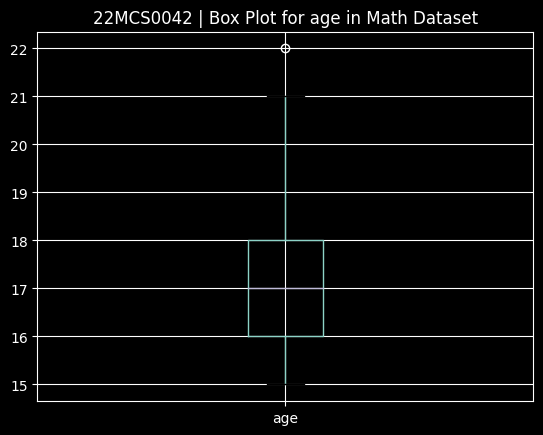

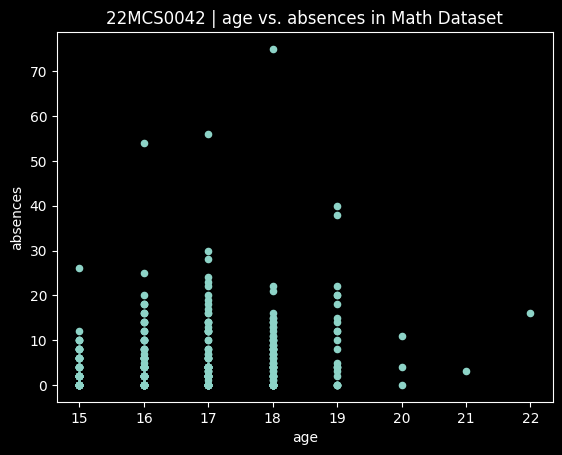

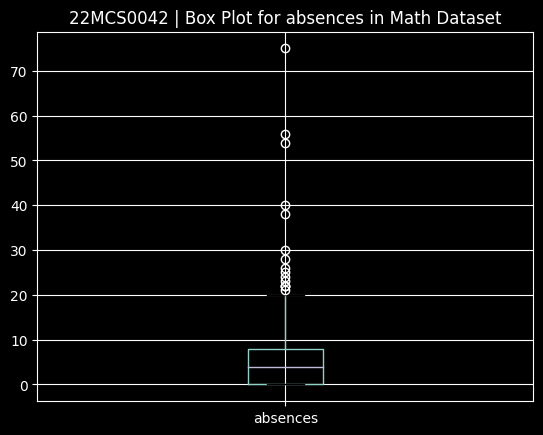

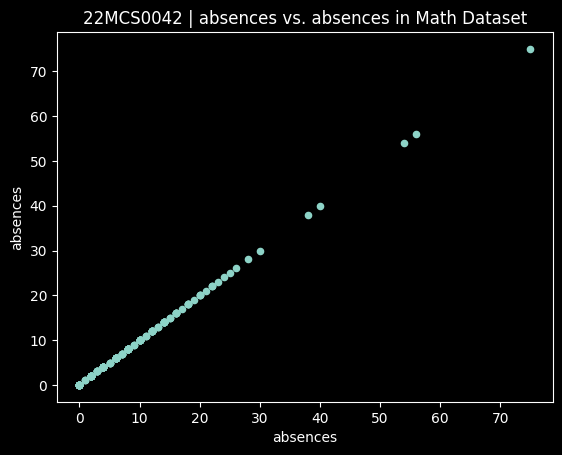

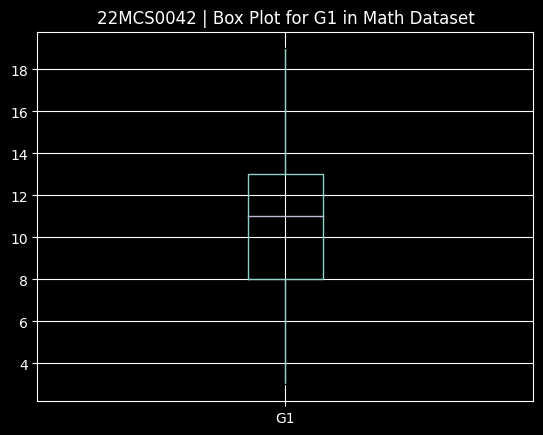

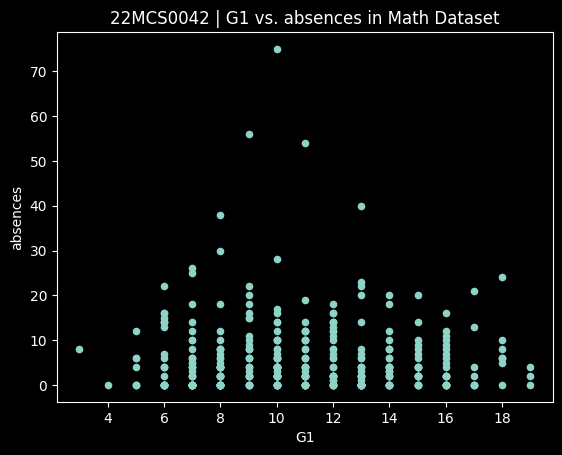

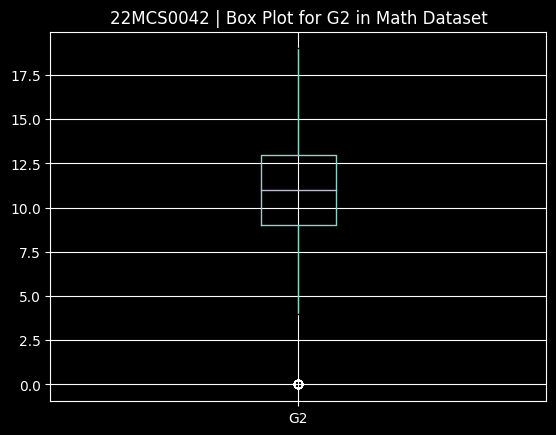

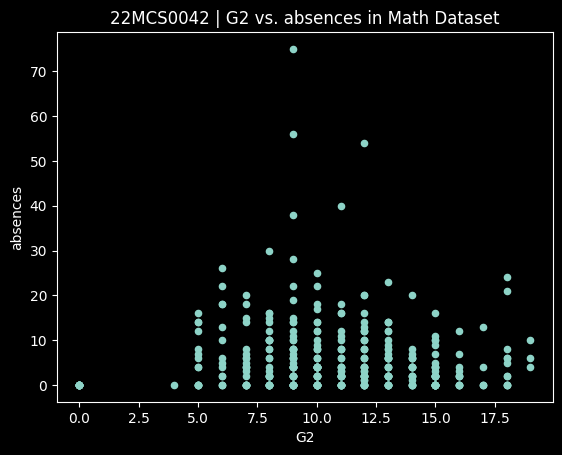

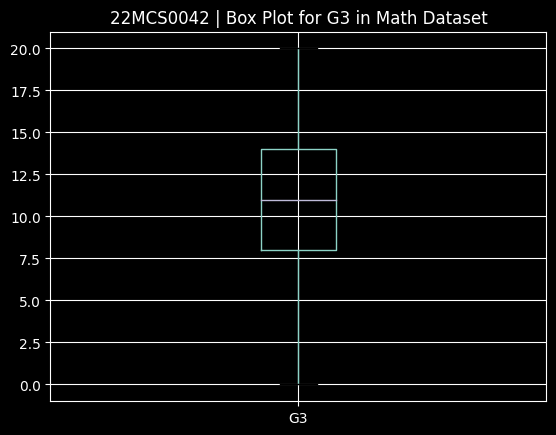

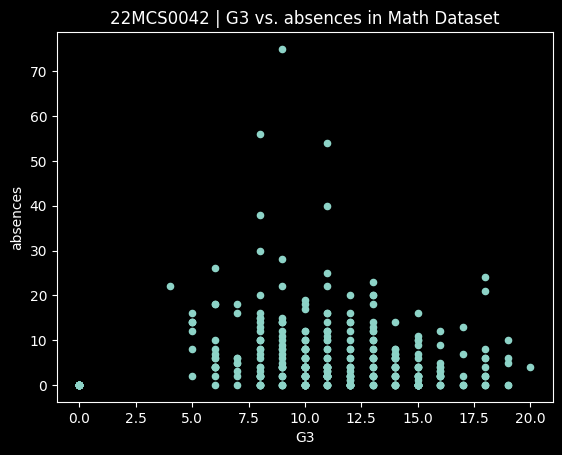

In [88]:
# Check for outliers in numerical variables
numerical_vars = ['age', 'absences', 'G1', 'G2', 'G3']
for var in numerical_vars:
    # Box plot
    df_math.boxplot(column=var)
    plt.title('22MCS0042 | Box Plot for ' + var + ' in Math Dataset')
    plt.show()

    # Scatter plot (against another numerical variable)
    df_math.plot.scatter(x=var, y='absences')
    plt.title('22MCS0042 | ' + var + ' vs. absences in Math Dataset')
    plt.show()

In [89]:
# Check cardinality in categorical variables
categorical_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for var in categorical_vars:
    # Unique values
    unique_values = df_math[var].nunique()
    print("Unique values in", var, "in Math Dataset:", unique_values)

    # Value counts
    value_counts = df_math[var].value_counts()
    print("Value counts for", var, "in Math Dataset:")
    print(value_counts)
    print("\n")

Unique values in school in Math Dataset: 2
Value counts for school in Math Dataset:
GP    349
MS     46
Name: school, dtype: int64


Unique values in sex in Math Dataset: 2
Value counts for sex in Math Dataset:
F    208
M    187
Name: sex, dtype: int64


Unique values in address in Math Dataset: 2
Value counts for address in Math Dataset:
U    307
R     88
Name: address, dtype: int64


Unique values in famsize in Math Dataset: 2
Value counts for famsize in Math Dataset:
GT3    281
LE3    114
Name: famsize, dtype: int64


Unique values in Pstatus in Math Dataset: 2
Value counts for Pstatus in Math Dataset:
T    354
A     41
Name: Pstatus, dtype: int64


Unique values in Mjob in Math Dataset: 5
Value counts for Mjob in Math Dataset:
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


Unique values in Fjob in Math Dataset: 5
Value counts for Fjob in Math Dataset:
other       217
services    111
teacher      29
at_home      20
health  

### Phase 2: *Data Integration*

In [71]:
# Merge the two datasets based on common attributes
merged_df = pd.merge(df_math, df_portuguese, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
                                                 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                                                 'traveltime', 'studytime', 'failures', 'schoolsup',
                                                 'famsup', 'paid', 'activities', 'nursery', 'higher',
                                                 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                                 'Dalc', 'Walc', 'health', 'absences'], suffixes=('_math', '_portuguese'))

### Phase 3: *Descriptive Statistics*

In [72]:
# Display summary statistics for the math dataset
print("Summary Statistics for Math Dataset:")
print(df_math.describe())  

Summary Statistics for Math Dataset:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.

In [73]:
# Display summary statistics for the Portuguese dataset
print("Summary Statistics for Portuguese Dataset:")
print(df_portuguese.describe())  

Summary Statistics for Portuguese Dataset:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431

### Phase 4: *Data Visualization*

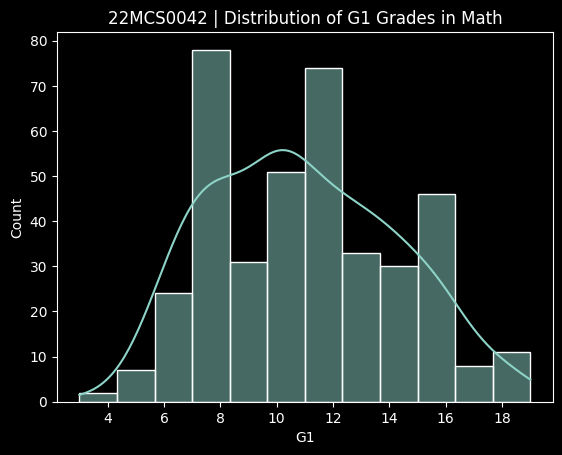

In [74]:
# Plot to visualize the distribution of the 'G1' grades in the Math dataset
sns.histplot(df_math['G1'], kde=True)
plt.title("22MCS0042 | Distribution of G1 Grades in Math")
plt.show()

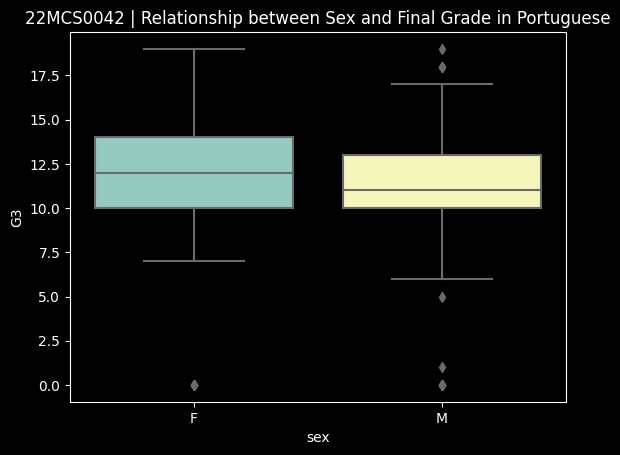

In [75]:
# Plot relationship between Sex and Final Grade in Portuguese
sns.boxplot(x='sex', y='G3', data=df_portuguese)
plt.title("22MCS0042 | Relationship between Sex and Final Grade in Portuguese")
plt.show()

C:\Users\sharm\AppData\Local\Temp\ipykernel_9712\2575437567.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_math.corr()


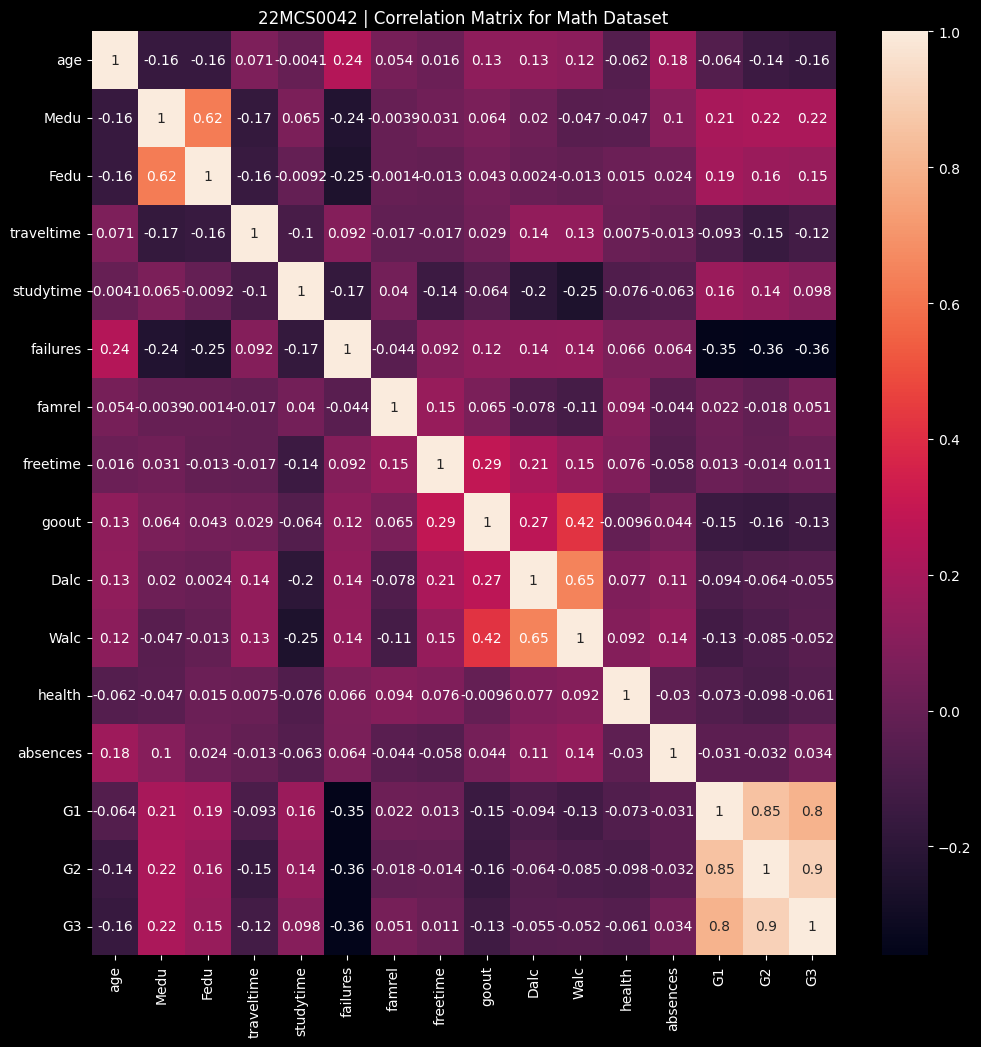

In [76]:
# Correlation Analysis
fig, ax = plt.subplots(figsize=(12, 12))
correlation_matrix = df_math.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("22MCS0042 | Correlation Matrix for Math Dataset")
plt.show()

Initialization for further analysis, modeling and evaluation

In [77]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# Load the Maths dataset
df = pd.read_csv('./dataset/student-mat.csv', sep=';')

# Select relevant features and target variable
features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences']
target = 'G3'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Phase 5: *Predictive Modeling*

In [79]:
# Predictive Modeling - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Phase 6: *Feature Selection*

In [80]:
# Feature Selection - SelectKBest
selector = SelectKBest(score_func=f_regression, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = [features[i] for i in selector.get_support(indices=True)]

print("Selected Features:", selected_features)

Selected Features: ['age', 'Medu', 'failures']


### Phase 7: *Clustering Analysis*

In [81]:
# Clustering Analysis - KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)

c:\Users\sharm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Phase 8: *Evaluation and Validation*

In [82]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Predictive Model Evaluation:")
print("Train Score:", train_score)
print("Test Score:", test_score)

Predictive Model Evaluation:
Train Score: 0.17319493558442778
Test Score: 0.06109089158272296


In [83]:
# Evaluate the feature selection
feature_scores = selector.scores_

print("Feature Selection Evaluation:")
print("Selected Features:", selected_features)
print("Feature Scores:", feature_scores)

Feature Selection Evaluation:
Selected Features: ['age', 'Medu', 'failures']
Feature Scores: [ 6.86211474 15.36217561  5.85224507  6.11396409 50.99024758  1.31615476]


In [84]:
# Evaluate the clustering
silhouette_avg = silhouette_score(X_train, clusters)

print("Clustering Evaluation:")
print("Silhouette Score:", silhouette_avg)

Clustering Evaluation:
Silhouette Score: 0.5959895937139176


In [85]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = model.score(X_test, y_test)

# Print predictions and accuracy score
print("Predictions:")
print(y_pred)
print("\nAccuracy Score:", accuracy)

Predictions:
[ 4.0638023   9.10683356  8.77963529 11.14213382  5.96716109 10.09991068
 11.72886321 10.92720359 10.31663194 11.72886321 11.04079487 12.09537035
 11.72246    10.20697301 10.63205734 10.72716049 10.60998716  9.7862763
  9.6386746  11.10421    11.05053167 10.79701703 11.82841113 11.1214612
 12.87102743 11.97558147 11.61428647 11.25751613 11.89711828 13.8366166
  9.59778339 10.28842596 11.8588013  11.29764309 11.50462755  9.33998793
  6.44394519 11.80771956 11.0126271   6.60344891  6.49500797 10.47253467
 11.79979274  6.36687986 10.18669385 11.82841113 11.475616    8.99773516
 12.89087523 10.79549343 10.67830114 11.86672812 11.65000686 11.04260485
 10.65873972 10.32593737 10.04131454 10.60998716 11.90726749 11.65000686
 12.10589376 10.81575364  3.35726477 10.90515235  6.55541408  9.92150641
  7.51097336  9.362983   11.95861664 12.00597163 12.18215352 10.55139102
 11.23974573 11.38442626  9.74573693 11.86851914 11.39717206 12.66445538
  5.00828749]

Accuracy Score: 0.06109089

In [86]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 19.252375648513986
Coefficient of Determination (R-squared): 0.06109089158272296
